In [0]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [0]:
train_data = dsets.MNIST(root = './data',
                         train = True,
                         transform = transforms.ToTensor(),
                         download = True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
len(train_data)

60000

In [0]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [0]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [0]:
train_data[0][0].size()

torch.Size([1, 28, 28])

In [0]:
train_data[0][1]

5

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
train_data[0][0].numpy().shape

(1, 28, 28)

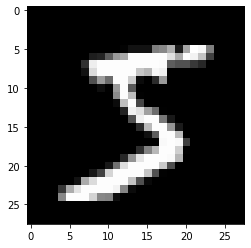

In [0]:
show_img = train_data[0][0].numpy().reshape(28,28)
plt.imshow(show_img, cmap = 'gray')

In [0]:
test_data = dsets.MNIST(root = './data',
                        train = False,
                        transform = transforms.ToTensor())

In [0]:
len(test_data)

10000

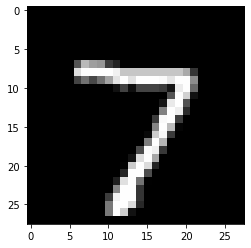

In [0]:
show_img = test_data[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap = 'gray')

In [0]:
batch_size = 100
n_iters = 3000
epochs = n_iters/(len(train_data)/batch_size)
epochs

5.0

In [0]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size = batch_size,
                                           shuffle = True)

In [0]:
test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                           batch_size = batch_size,
                                           shuffle = False)

In [0]:
class FeedforwardNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.sigmoid(self.fc1(x))
        out = self.fc2(out)
        return out


In [0]:
model = FeedforwardNeuralNetwork(28*28, 100, 10)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [0]:
print(model.parameters())
print(len(list(model.parameters())))
print(list(model.parameters())[0].size())
print(list(model.parameters())[1].size())
print(list(model.parameters())[2].size())
print(list(model.parameters())[3].size())

<generator object Module.parameters at 0x7fed5f2b50f8>
4
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [0]:
inputs = torch.rand(1, 784)
outputs = model(inputs)

In [0]:
print(torch.argmax(outputs.data, 1))

tensor([2])


In [0]:
iter = 0
for epoch in range(int(10)):
    for i, (images, labels) in enumerate(train_loader):

        inputs = images.view(-1,784)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter%500 == 0:
            correct = 0
            total = 0
            for (images, labels) in test_loader:
                inputs = images.view(-1, 28*28)
                outputs = model(inputs)
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += np.sum((predicted == labels).numpy())
                accuracy = correct/total
            print('iteration : {}, loss : {}, accuracy : {}'.format(iter, loss,
                                                                    accuracy))


iteration : 500, loss : 0.37149882316589355, accuracy : 0.9119
iteration : 1000, loss : 0.2185870110988617, accuracy : 0.9294
iteration : 1500, loss : 0.17662836611270905, accuracy : 0.9403
iteration : 2000, loss : 0.2768649160861969, accuracy : 0.9491
iteration : 2500, loss : 0.24738258123397827, accuracy : 0.9525
iteration : 3000, loss : 0.21697159111499786, accuracy : 0.9562
iteration : 3500, loss : 0.14897896349430084, accuracy : 0.9596
iteration : 4000, loss : 0.18923349678516388, accuracy : 0.9612
iteration : 4500, loss : 0.03500768542289734, accuracy : 0.9633
iteration : 5000, loss : 0.03876177594065666, accuracy : 0.9652
iteration : 5500, loss : 0.036057375371456146, accuracy : 0.9677
iteration : 6000, loss : 0.06490514427423477, accuracy : 0.9685


## Model B : Relu Inactivation

In [0]:
class FeedforwardNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = self.fc2(out)
        return out


In [0]:
model = FeedforwardNeuralNetwork(28*28, 100, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [0]:
iter = 0
for epoch in range(int(10)):
    for i, (images, labels) in enumerate(train_loader):

        inputs = images.view(-1,784)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter%500 == 0:
            correct = 0
            total = 0
            for (images, labels) in test_loader:
                inputs = images.view(-1, 28*28)
                outputs = model(inputs)
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += np.sum((predicted == labels).numpy())
                accuracy = correct/total
            print('iteration : {}, loss : {}, accuracy : {}'.format(iter, loss,
                                                                    accuracy))


iteration : 500, loss : 0.1591619849205017, accuracy : 0.9341
iteration : 1000, loss : 0.20380592346191406, accuracy : 0.945
iteration : 1500, loss : 0.10320080816745758, accuracy : 0.9597
iteration : 2000, loss : 0.08788227289915085, accuracy : 0.9649
iteration : 2500, loss : 0.058119162917137146, accuracy : 0.9691
iteration : 3000, loss : 0.07750257849693298, accuracy : 0.9692
iteration : 3500, loss : 0.05153029412031174, accuracy : 0.9724
iteration : 4000, loss : 0.07450170069932938, accuracy : 0.9708
iteration : 4500, loss : 0.09595514088869095, accuracy : 0.9733
iteration : 5000, loss : 0.07810796052217484, accuracy : 0.9733
iteration : 5500, loss : 0.009093070402741432, accuracy : 0.9753
iteration : 6000, loss : 0.033238254487514496, accuracy : 0.9757


In [0]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'feedforward_neural_network.pk')

## Model C : Additional Hidden Layer

In [0]:
class FeedforwardNeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim_1, hidden_dim_2, output_dim):
        super(FeedforwardNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, output_dim)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out


In [0]:
model = FeedforwardNeuralNetwork(28*28, 128, 64, 10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [0]:
iter = 0
for epoch in range(int(10)):
    for i, (images, labels) in enumerate(train_loader):

        inputs = images.view(-1,784)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        iter += 1

        if iter%500 == 0:
            correct = 0
            total = 0
            for (images, labels) in test_loader:
                inputs = images.view(-1, 28*28)
                outputs = model(inputs)
                predicted = torch.argmax(outputs.data, 1)
                total += labels.size(0)
                correct += np.sum((predicted == labels).numpy())
                accuracy = correct/total
            print('iteration : {}, loss : {}, accuracy : {}'.format(iter, loss,
                                                                    accuracy))


iteration : 500, loss : 0.17775768041610718, accuracy : 0.939
iteration : 1000, loss : 0.3318881690502167, accuracy : 0.9579
iteration : 1500, loss : 0.13159459829330444, accuracy : 0.9642
iteration : 2000, loss : 0.0987284779548645, accuracy : 0.967
iteration : 2500, loss : 0.05315057188272476, accuracy : 0.9713
iteration : 3000, loss : 0.21093446016311646, accuracy : 0.9724
iteration : 3500, loss : 0.021057965233922005, accuracy : 0.9747
iteration : 4000, loss : 0.08346867561340332, accuracy : 0.9745
iteration : 4500, loss : 0.028891656547784805, accuracy : 0.9767
iteration : 5000, loss : 0.021713923662900925, accuracy : 0.9752
iteration : 5500, loss : 0.017739297822117805, accuracy : 0.9784
iteration : 6000, loss : 0.014473958872258663, accuracy : 0.9757
